# JODA 2022 Learning diary

This notebook is available on: https://github.com/htaim/JODA2022/blob/main/Oppimispaivakirja.ipynb

You can also run the notebook on Google Colab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/htaim/JODA2022/blob/main/Oppimispaivakirja.ipynb)

## Week 1

Created Git Repository: https://github.com/htaim/JODA2022

The learning diary for this cource will be updated on that Git Repository once a week minimum.

I created that repository and cloned it into my laptop in TUNI OneDrive folder, so there is a backup of backup with this implementation. Version control in Git is easy, and commits will be done often. This ensures agility with going back to older versions. Git is easy to use from command line. At the end of the course, the whole learning diary can be published for easy access with .zip export.

This week I participated in live lecture, and watched the demo session recording. I noticed that the course staff uses MacOS devices, and some of the installation steps could be explained a little more specified format. I think that is not relevant to only show "type pip install...", but explain the different installation options and how they differ from each other.

### Week's insights

Learned to create a Git repo and new insight about how they work. I also improved in creating ssh keys and using command line. I had never heard of a Jupyter Notebook (or Jupyter Lab), so this week's biggest insight was information about them. I also learned how to use them with Python code and Markdown formatting. I have used Python quite a bit, but still haven't used that much Pandas library. This week gave me idea on how to use some basic Pandas functions and some data formatting.

### Code demo

In [7]:
#Demo how to import data into this Python notebook, and do some basic analysis
#Code illustrated in this partially referenced from: https://github.com/InfoTUNI/joda2022/blob/master/koodiesimerkit/Session%201%20-%20Analysis%20of%20Transactions.ipynb
#Libraries can be imported as:
import pandas
import matplotlib.pyplot as plot
from matplotlib import style

In [12]:
#Data can be imported into pandas from url containing a csv file:
url = 'https://github.com/jodatut/2020/raw/master/koodiesimerkit/SalesJan2009.csv'

dataframe = pandas.read_csv(url)

#An overview of data and data types
print(dataframe.head())
print(dataframe.dtypes)

  Transaction_date   Product  Price Payment_Type               Name  \
0      1/2/09 6:17  Product1   1200   Mastercard           carolina   
1      1/2/09 4:53  Product1   1200         Visa             Betina   
2     1/2/09 13:08  Product1   1200   Mastercard  Federica e Andrea   
3     1/3/09 14:44  Product1   1200         Visa              Gouya   
4     1/4/09 12:56  Product2   3600         Visa            Gerd W    

                           City     State         Country Account_Created  \
0                      Basildon   England  United Kingdom     1/2/09 6:00   
1  Parkville                           MO   United States     1/2/09 4:42   
2  Astoria                             OR   United States    1/1/09 16:21   
3                        Echuca  Victoria       Australia   9/25/05 21:13   
4  Cahaba Heights                      AL   United States  11/15/08 15:47   

     Last_Login   Latitude   Longitude  
0   1/2/09 6:08  51.500000   -1.116667  
1   1/2/09 7:49  39.195000  

In [9]:
#The datatypes can be changed:
dataframe['Transaction_date'] = pandas.to_datetime(dataframe['Transaction_date'])
print(dataframe.dtypes)

Transaction_date    datetime64[ns]
Product                     object
Price                        int64
Payment_Type                object
Name                        object
City                        object
State                       object
Country                     object
Account_Created             object
Last_Login                  object
Latitude                   float64
Longitude                  float64
dtype: object


### Learning outcomes

1. My goal is to take a step forward to data analytics, learn the latest and most important tools and improve myself as a data scientist.
2. I will be chasing the most advanced tools and methods in this course, but the highest course grade will not be my main goal.
3. I try to focus especially on the main assignment. I will use that as a part of my portfolio in CV.

## Week 2

This week's lecture was about data collecting and cleaning (+reformatting). I attended the lecture. First, we talked about the process of data science. This lecture focused on the preparation step. I watched the demo session recording afterwards, and it was quite interesting! I haven't used scraping or crawling before, or even heard of them. I still have wondered how this kind of data collection could be possible, and demo lecture a gave quite good demostration about it. The important part of lecture was also to understand that you have to keep in mind the legal part when scraping on websites. Authors can fight back crawling with robots.txt-files, which includes information for what's allowed and what is not in this website. The robots.txt is only a guideline, so dynamic website structures are a more effective method.

This week's code session example was quite fast. For example inspecting the different html elements or using other scrapers like BeautifulSoup could be demonstrated more specifically. This would be nice if one can't make it physically to the session.

### Code demo

Here is a demo of crawling website data. Goal is to save the product reviews in clean format. Part of code is referenced from Demo Session 2.

This created a scraper which includes the following code:

class VerkkokauppaScraperSpider(scrapy.Spider):
    name = 'verkkokauppa_scraper'
    allowed_domains = ['verkkokauppa.com']
    start_urls = ['http://verkkokauppa.com/']

    def parse(self, response):
        pass

We need to make the following modifications in order to scraper to collect review information for us. The required elements are inspected manually from Verkkokauppa.com site. In here it's easy to understand, that with dynamic website structures it's possible to make entry-level scrapers useless. Some of the function parameters are hard-coded particularly for this website because parsing html code took quite a long practise :). The following code is in verkkokauppa_scraper.py and output of this code is displayed in verkkokauppa_out.json.

In [10]:
import scrapy
import re

class VerkkokauppaScraperSpider(scrapy.Spider):
    name = 'verkkokauppa_scraper'
    allowed_domains = ['verkkokauppa.com']
    start_urls = ['https://www.verkkokauppa.com/fi/product/332585/Plantronics-Voyager-5200-Bluetooth-kuuloke/reviews']
    
    def parse(self, response):
        
        #Review text saved into string
        review_texts = response.css('[class="review-content-wrapper"] > p::text').extract()

        #Review ratings saved into string
        review_ratings = response.css('[class="review-content__ratings"] > div > div').extract()
        
        #Parse review ratings with format "Arvosana x/x" from html code. Every text review includes four ratings
        for i in range(len(review_ratings)):
            review_ratings[i] = re.findall('[A-Za-z]{8}[ ][0-5][/][0-5]', review_ratings[i])

        #review texts and ratings saved into vector -> returned from function
        for i in range(len(review_texts)):
            review = {
                'text' : review_texts[i],
                'rating': review_ratings[i]
            }
            yield review
        
        #counter for pages
        counter = 1
        max_pages = 3
        
        if(counter <= max_pages): 
            #Moving to next page
            next_page_url = "https://www.verkkokauppa.com/fi/product/332585/Plantronics-Voyager-5200-Bluetooth-kuuloke/reviews?page=" + str(counter)
            counter += 1
            yield response.follow(next_page_url, self.parse)

In [11]:
import pandas
#Read output file
pandas.read_json("verkkokauppa_out.json")

,text,rating
0,"Edellinen vastaava useamman vuoden jo vanha, t...","[Arvosana 1/5, Arvosana 1/5, Arvosana 1/5, Arv..."
1,Vastapuoli ei kuule mitään jos edes auton taus...,"[Arvosana 1/5, Arvosana 1/5, Arvosana 4/5, Arv..."
2,Edellinen yksilö joskus - 19 ostettuna oli läh...,"[Arvosana 1/5, Arvosana 1/5, Arvosana 1/5, Arv..."
3,Toki jos ei mitään taustamelua ole niin laite ...,"[Arvosana 1/5, Arvosana 1/5, Arvosana 2/5, Arv..."
4,"Kaupasta ulos, korvaan ja 15 sekunttia puhe ku...","[Arvosana 1/5, Arvosana 1/5, Arvosana 1/5, Arv..."
5,"Sutta ja sekundaa, kolmas testikappale testattu.","[Arvosana 1/5, Arvosana 1/5, Arvosana 1/5, Arv..."
6,Tämä on nyt jo toinen laite takuuseen ja edell...,"[Arvosana 2/5, Arvosana 2/5, Arvosana 2/5, Arv..."
7,Aikaisempi malli toimi joka olosuhteissa ja me...,"[Arvosana 2/5, Arvosana 2/5, Arvosana 4/5, Arv..."
8,Tuulessa/melussa jos työskentelet niin ääni sa...,"[Arvosana 3/5, Arvosana 2/5, Arvosana 2/5, Arv..."
9,"Ostin samanlaisen, kuin n.5 vuotta sitten. Akk...","[Arvosana 2/5, Arvosana 2/5, Arvosana 2/5, Arv..."


Despite the errors in output file (all numeric reviews in every item + some formatting errors when extracting paragraph text, because some review html bodies have different paragraphs) this excercise and modification from amazon_scraper to verkkokauppa_scraper gave me very important insight on data scraping. I'm sure this code can be developed further when the course goes deeper.

### Week's insight

The two most importat learning outcomes in this week were web crawlers and scrapers. I really had not heard or used them before. The code examples gave me a very good start, and I was able to examine the crawling for different website. I also learned about regular expressions, and how they can be used when evaluating output from html scraping. Overall, this week gave much insight about actually doing data capturing. 

The data amount doesn't always (never) compensate over quality. This can be also learned when doing small scraping from a website. It is much smarter to collect only relevant data, and not even analyse the "noise". Data processing takes time and resources, so it's very important to focus on the essential only, even though nowadays a laptop can have a huge amount of computational power. With this in mind, the preparation step of data analytics becomes even more important. It's also important for data scientist to understand a broad spectrum of different tools and methods, ratrher than focusing in a small area. We live in a world where the information and knowledge evolves with speed, and broader spectrum gives us opportunity to keep up with the developing environment. 

## Week 3

This week's lecture was about machine learning. First, the difference between machine learning and artificial intelligence was declared. The most important division was between controlled and uncontrolled learning. Machine learning is a broad concept, and an easy way to get started with it is to use excisting Python libraries. 

Streaming of the lectuers was a quite nice add for the course. Machine learning demos in lecture were interesting, especially the lecturer's "bubblegum" setup. 

Here is an example of dataset which I have recorded with my fitness device Garmin Edge 1030. The activity is about one hour long, and recording interval has been one second so there is 3694 entries in this dataset

In [26]:
import pandas
import matplotlib.pyplot as plot
from matplotlib import style
#Import activity data in csv format
df_activity = pandas.read_csv("activity_output.csv")
#Rename first colum
df_activity = df_activity.rename(columns={"AccumulatedPower":"CumulativeWork"}, errors = "raise")
df_activity

,CumulativeWork,Cadence,Distance,FractionalCadence,HeartRate,LeftRightBalance,Power,Temperature,Timestamp
0,295,94,0,0,143,181,295,18,1013616118
1,560,98,0,0,145,174,265,18,1013616119
2,861,101,0,0,145,178,301,18,1013616120
3,1062,91,0,0,147,199,201,18,1013616121
4,1375,85,0,0,147,180,313,18,1013616122
...,...,...,...,...,...,...,...,...,...
3689,1070492,84,0,0,202,178,488,17,1013619807
3690,1070984,85,0,0,202,178,492,17,1013619808
3691,1071430,84,0,0,202,177,446,17,1013619809
3692,1071876,84,0,0,203,177,446,17,1013619810


### Cumulative power aka work in kJ

<AxesSubplot:xlabel='time (s)', ylabel='CumulativeWork (kJ)'>

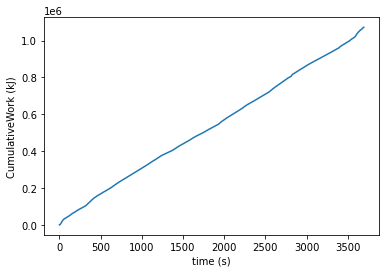

In [32]:
df_activity["CumulativeWork"].plot(xlabel = "time (s)", ylabel = "CumulativeWork (kJ)")